## Leitura de uma base de imagens na forma
* base/
    * treino/
        * classes/...
            * imagens/...
    * teste/
        * classes/...
            * imagens/...

#### Será salva no formato
[matriz, numero da classe, nome da pasta onde a imagem esta salva (nome da classe)]

In [11]:
from prettytable import PrettyTable
from prettytable import MSWORD_FRIENDLY

ModuleNotFoundError: No module named 'prettytable'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
import os
import pathlib

In [2]:
DATADIR = "../bases/dados/imagens/cifar10/train"

DATADIR = pathlib.Path(DATADIR)

IMG_SIZE = 2#'original'#Tamanho mxm e original

formato = 'png'

nome_saida = "cifar10-train-3-2x2"

local_saida = "../bases/pickle/imagens/cifar10/"

In [3]:
CATEGORIES = os.listdir(DATADIR)
CATEGORIES.sort()

try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
SIZE_OF_DATASET = len(list(DATADIR.glob('*/*.'+formato)))

print("Number of training images: ",SIZE_OF_DATASET)

Number of training images:  50000


In [5]:
def prep_data(DATA_DIR, CATEGORIES, IMG_SIZE):
    data = []
    for category in CATEGORIES:
        i=0
        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)#############

        for img in tqdm(os.listdir(path)):

#            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            img_array = cv2.imread(os.path.join(path,img) ,cv2.cv2.IMREAD_COLOR)
            
            if IMG_SIZE == 'original':
                new_array = img_array
            else:
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            
            data.append([new_array, class_num, category])
            i=i+1
            if i >= 3:
                break

        plt.figure(figsize=(1,1))
        plt.imshow(new_array, cmap='gray')
        plt.show()
    return data

  0%|          | 2/5000 [00:00<00:02, 1683.78it/s]


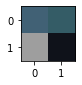

  0%|          | 2/5000 [00:00<00:02, 2228.64it/s]


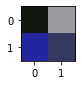

  0%|          | 2/5000 [00:00<00:02, 2335.36it/s]


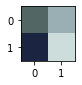

  0%|          | 2/5000 [00:00<00:02, 2329.52it/s]


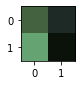

  0%|          | 2/5000 [00:00<00:02, 2259.86it/s]


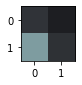

  0%|          | 2/5000 [00:00<00:02, 2398.12it/s]


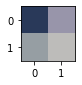

  0%|          | 2/5000 [00:00<00:02, 2282.61it/s]


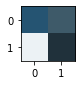

  0%|          | 2/5000 [00:00<00:02, 1908.24it/s]


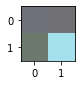

  0%|          | 2/5000 [00:00<00:02, 2061.08it/s]


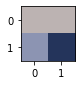

  0%|          | 2/5000 [00:00<00:02, 2162.57it/s]


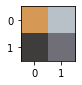

Number of images:  30


In [6]:
data = prep_data(DATADIR, CATEGORIES, IMG_SIZE)
print('Number of images: ',len(data))

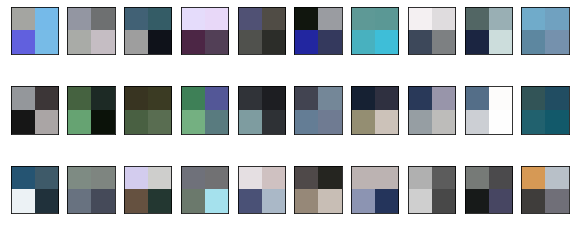

In [7]:
plt.figure(figsize=(10,10))
m = 70
if( len(data) < 70 ):
    m = len(data)
for i in range(m):
    plt.subplot(7,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i][0], cmap='gray')
    plt.xlabel("{}\n({})".format( data[i][1] , data[i][2] ), color='white')    
plt.show()

In [8]:
def save_data(save_name, data):
    pickle_out = open(save_name+"-pickle.pickle","wb")
    print('Arquivo gravado como: '+save_name+"-pickle.pickle")
    pickle.dump(data, pickle_out)
    pickle_out.close()

In [9]:
save_data(local_saida+nome_saida, data)

Arquivo gravado como: ../bases/pickle/imagens/cifar10/cifar10-train-3-2x2-pickle.pickle
